dataset: (92,) (92,)
train: (92, 1) (92, 1)


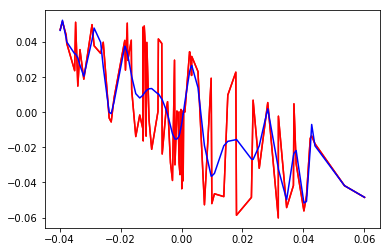

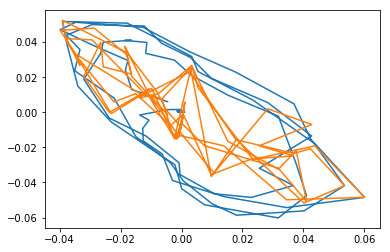

In [46]:
# http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)

def file2mat(path):
    with open(path,'r') as src_file:
        lines = src_file.read().splitlines()
        for i in range(len(lines)):
            vec = [float(j) for j in lines[i].split(' ')[:-1]]
            lines[i] = vec
        mat = np.array(lines)
        return mat
    return 

def sort_x(x,y):
    L = sorted(zip(x,y))
    L = np.array(L)    
    return L[:,0], L[:,1]
    
def divide_data(x,y,num):
    selected_indices = np.unique(np.random.choice(x.shape[0],num,replace=False))
    x_train = x[selected_indices,:]
    y_train = y[selected_indices,:]
    
    print "test_size", x_train.shape, y_train.shape
    
    return x_train,y_train

x = file2mat('gp1/f_x_v.txt')
y = file2mat('gp1/f_y.txt')
x = x[:,0]
y = y[:,1]

# Sort the data and then plot
print 'dataset:',x.shape, y.shape
x_show, y_show = sort_x(x,y)
plt.plot(x_show,y_show,'r')

# train the Gaussian Process, get the predicted y, not in sorted order
x_train = np.atleast_2d(x).T
y_train = np.atleast_2d(y).T
print "train:", x_train.shape, y_train.shape

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)#gp = GaussianProcessRegressor()
gp.fit(x_train, y_train)
y_pred = gp.predict(x_train)

# sort data and then plot
x_show, y_show = sort_x(x,y_pred)
plt.plot(x_show,y_show,'b')

plt.show()

plt.plot(x,y)
plt.plot(x_train,y_pred)
plt.show()

dataset: (92,) (92,)


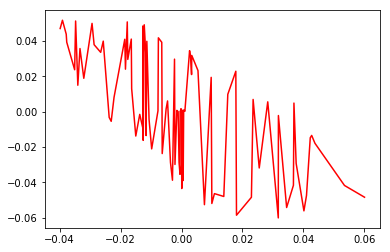

Using TensorFlow backend.


a -> b
b -> c
c -> d
d -> e
e -> f
f -> g
g -> h
h -> i
i -> j
j -> k
k -> l
l -> m
m -> n
n -> o
o -> p
p -> q
q -> r
r -> s
s -> t
t -> u
u -> v
v -> w
w -> x
x -> y
y -> z
[[[ 0.        ]]

 [[ 0.03846154]]

 [[ 0.07692308]]

 [[ 0.11538462]]

 [[ 0.15384615]]

 [[ 0.19230769]]

 [[ 0.23076923]]

 [[ 0.26923077]]

 [[ 0.30769231]]

 [[ 0.34615385]]

 [[ 0.38461538]]

 [[ 0.42307692]]

 [[ 0.46153846]]

 [[ 0.5       ]]

 [[ 0.53846154]]

 [[ 0.57692308]]

 [[ 0.61538462]]

 [[ 0.65384615]]

 [[ 0.69230769]]

 [[ 0.73076923]]

 [[ 0.76923077]]

 [[ 0.80769231]]

 [[ 0.84615385]]

 [[ 0.88461538]]

 [[ 0.92307692]]]
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0

In [2]:
print 'dataset:',x.shape, y.shape
x_show, y_show = sort_x(x,y)
plt.plot(x_show,y_show,'r')
plt.show()

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

np.random.seed(7)
# define the raw dataset
alphabet = "abcdefghijklmnopqrstuvwxyz"

# create mapping from char to int
char_to_int = dict((c,i) for i,c in enumerate(alphabet))
int_to_char = dict((i,c) for i,c in enumerate(alphabet))

# prepare the dataset of input ot output pairs encoded as integers
seq_length = 1
X = []
Y = []
for i in range(0,len(alphabet)-seq_length, 1):
    seq_in = alphabet[i:i+seq_length]
    seq_out = alphabet[i+seq_length]
    X.append([char_to_int[char] for char in seq_in])
    Y.append([char_to_int[seq_out]])
    print seq_in, '->', seq_out

# LSTM format: samples, time steps, features
X = np.reshape(X,(len(X),seq_length,1))
# normalize 
X = X/float(len(alphabet))
print X
# value to binary data
Y = np_utils.to_categorical(Y)
print Y

In [3]:
model = Sequential()
# first param 32 units,
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(Y.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])
model.fit(X,Y, epochs = 500, batch_size = 1, verbose = 0)

scores = model.evaluate(X,Y,verbose=0)
print ('model accuracy: %.2f%%' % (scores[1]*100))


model accuracy: 88.00%


In [4]:
# prepare the dataset of input ot output pairs encoded as integers
seq_length = 3
X = []
Y = []
for i in range(0,len(alphabet)-seq_length, 1):
    seq_in = alphabet[i:i+seq_length]
    seq_out = alphabet[i+seq_length]
    X.append([char_to_int[char] for char in seq_in])
    Y.append([char_to_int[seq_out]])
    print seq_in, '->', seq_out

# LSTM format: samples, time steps, features
# The difference is that the reshaping of the input data takes the sequence
# as a time step sequence of one feature, rather than a single time step of 
# multiple features

X = np.reshape(X,(len(X),seq_length,1))
# normalize 
X = X/float(len(alphabet))
# value to binary data
Y = np_utils.to_categorical(Y)

model = Sequential()
# first param 32 units,
model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(Y.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])
model.fit(X,Y, epochs = 500, batch_size = 1, verbose = 0)

scores = model.evaluate(X,Y,verbose=0)
print ('model accuracy: %.2f%%' % (scores[1]*100))

abc -> d
bcd -> e
cde -> f
def -> g
efg -> h
fgh -> i
ghi -> j
hij -> k
ijk -> l
jkl -> m
klm -> n
lmn -> o
mno -> p
nop -> q
opq -> r
pqr -> s
qrs -> t
rst -> u
stu -> v
tuv -> w
uvw -> x
vwx -> y
wxy -> z
model accuracy: 100.00%


dataset: (92,) (92,)


/home/jiabiao/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/jiabiao/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/jiabiao/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if

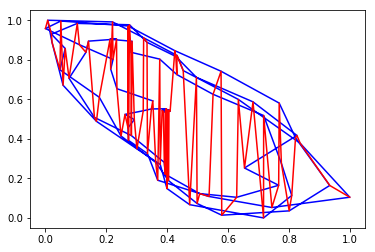

(89, 3, 1) (89, 1)
Epoch 1/100
0s - loss: 0.2487
Epoch 2/100
0s - loss: 0.1413
Epoch 3/100
0s - loss: 0.1044
Epoch 4/100
0s - loss: 0.0713
Epoch 5/100
0s - loss: 0.0369
Epoch 6/100
0s - loss: 0.0139
Epoch 7/100
0s - loss: 0.0080
Epoch 8/100
0s - loss: 0.0074
Epoch 9/100
0s - loss: 0.0072
Epoch 10/100
0s - loss: 0.0071
Epoch 11/100
0s - loss: 0.0070
Epoch 12/100
0s - loss: 0.0070
Epoch 13/100
0s - loss: 0.0069
Epoch 14/100
0s - loss: 0.0068
Epoch 15/100
0s - loss: 0.0068
Epoch 16/100
0s - loss: 0.0068
Epoch 17/100
0s - loss: 0.0067
Epoch 18/100
0s - loss: 0.0067
Epoch 19/100
0s - loss: 0.0067
Epoch 20/100
0s - loss: 0.0066
Epoch 21/100
0s - loss: 0.0066
Epoch 22/100
0s - loss: 0.0066
Epoch 23/100
0s - loss: 0.0066
Epoch 24/100
0s - loss: 0.0066
Epoch 25/100
0s - loss: 0.0066
Epoch 26/100
0s - loss: 0.0065
Epoch 27/100
0s - loss: 0.0065
Epoch 28/100
0s - loss: 0.0065
Epoch 29/100
0s - loss: 0.0065
Epoch 30/100
0s - loss: 0.0065
Epoch 31/100
0s - loss: 0.0065
Epoch 32/100
0s - loss: 0.006

In [39]:


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(x,y,seq_length):
    X = []
    Y = []
    for i in range(0,len(x)-seq_length, 1):
        seq_in = x[i:i+seq_length]
        seq_out = y[i+seq_length]
        X.append([seq_in])
        Y.append([seq_out])
        # print seq_in, '->', seq_out

    X = np.reshape(X,(len(X),seq_length,1))
    Y = np.reshape(Y,(len(Y),1))
    return X,Y
    
x = file2mat('gp1/f_x_v.txt')
y = file2mat('gp1/f_y.txt')
x = x[:,0]
y = y[:,1]

scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)


# Sort the data and then plot
print 'dataset:',x.shape, y.shape
x_order, y_order = sort_x(x,y)
plt.plot(x,y,'b')
plt.plot(x_order,y_order,'r')
plt.show()

# build dataset based on x,y
seq_length = 3
X, Y = create_dataset(x,y, seq_length)



print X.shape, Y.shape

model = Sequential()
model.add(LSTM(10, input_shape=(X.shape[1],X.shape[2])))
model.add(Dense(Y.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X,Y,epochs=100, batch_size=batch_size, verbose=2, shuffle=False)


(89, 1)


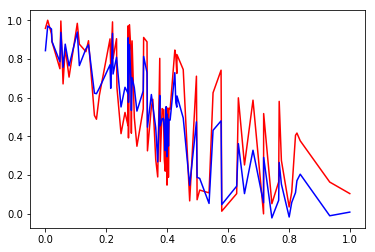

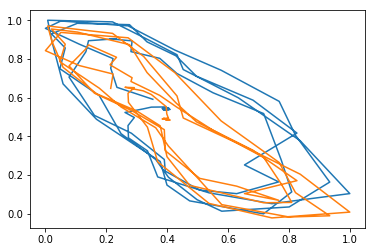

(92,) (89, 1)


In [40]:

x_show, y_show = sort_x(x,y)
plt.plot(x_show,y_show,'r')

y_pred = model.predict(X, batch_size=batch_size)
x_pred = X[:,-1,:]
print x_pred.shape


x_show, y_pred_show = sort_x(x_pred,y_pred)
plt.plot(x_show,y_pred_show,'b')
plt.show()

plt.plot(x,y)
plt.plot(x_pred,y_pred)
plt.show()


print x.shape, y_pred.shape